# n_estimators

In [2]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [4]:
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
X = data.data
y = data.target

In [6]:
X.shape

(506, 13)

In [7]:
y.shape

(506,)

In [8]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [10]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)

In [11]:
reg.predict(Xtest)

array([ 6.6689262, 22.34918  , 31.052807 , 13.911595 ,  9.467966 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779037 ,
       37.13194  , 20.133305 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165182 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666289 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [12]:
reg.score(Xtest,Ytest)

0.9050988968414799

In [13]:
y.mean()

22.532806324110677

In [14]:
MSE(Ytest,reg.predict(Xtest))

8.830916343629323

In [15]:
reg.feature_importances_ 

array([0.01902167, 0.0042109 , 0.01478316, 0.00553537, 0.02222196,
       0.37914088, 0.01679686, 0.0469872 , 0.04073574, 0.05491759,
       0.06684221, 0.00869464, 0.3201119 ], dtype=float32)

In [16]:
reg = XGBR(n_estimators=100)

In [17]:
CVS(reg,Xtrain,Ytrain,cv=5).mean()

0.7995062821902295

In [18]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.215644229762717

In [19]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [20]:
#使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.8023799994631826

In [21]:
CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.75547736072435

In [22]:
lr = LinearR()
CVS(lr,Xtrain,Ytrain,cv=5).mean()

0.6835070597278087

In [23]:
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.349507493648424

In [26]:
reg = XGBR(n_estimators=10)
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-18.633733952333067

In [31]:
#定义绘制以训练样本数为横坐标的学习曲线的函数
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, 
                        ylim=None, 
                        cv=None,
                        n_jobs=None 
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs)      
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() 
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [32]:
cv = KFold(n_splits=5, shuffle = True, random_state=42)

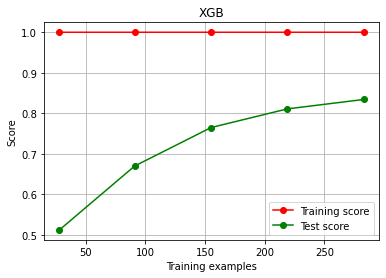

In [33]:
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
                    ,"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

160 0.8320776498992342


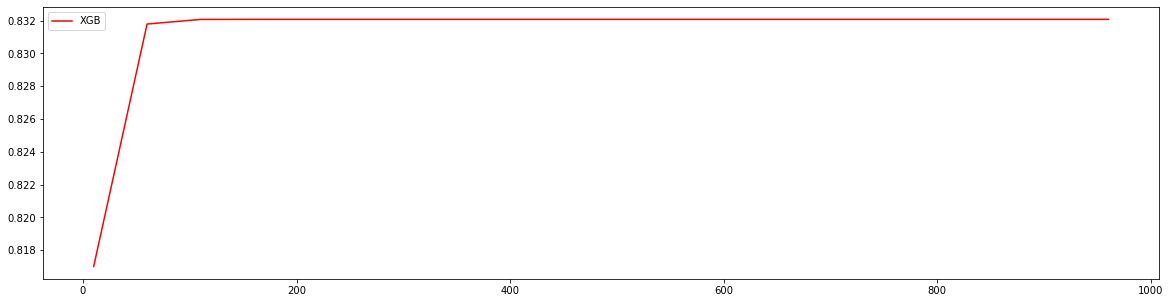

In [34]:
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929 0.03353716440826495


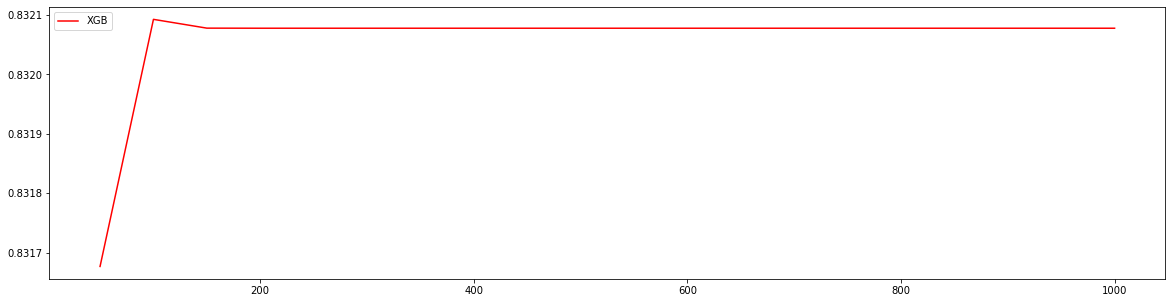

In [35]:
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    
    var.append(cvresult.var())
    
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929 0.03353716440826495


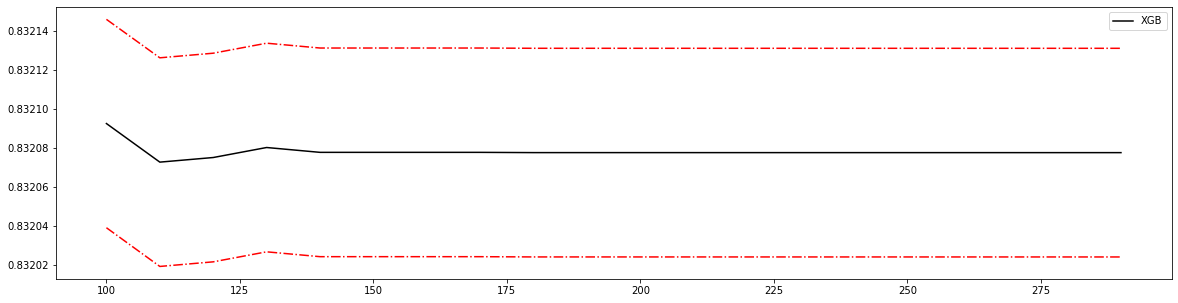

In [36]:
#使用参数学习曲线观察n_estimators对模型的影响
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

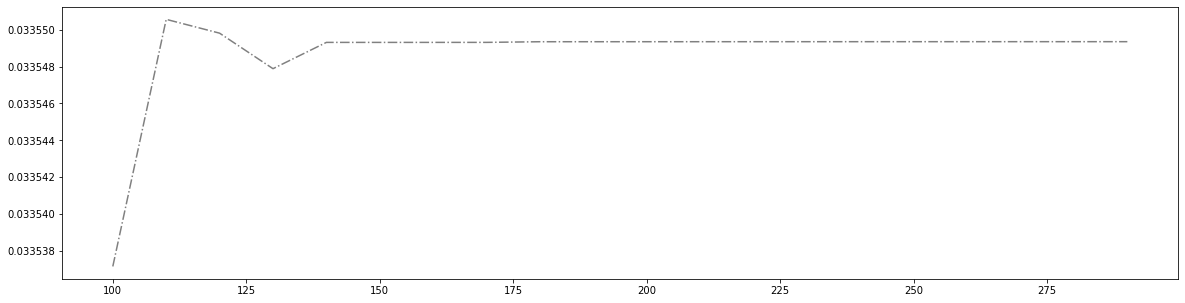

In [37]:
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

In [38]:
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050988968414799
0.12573003768920898


In [41]:
time0 = time()
print(XGBR(n_estimators=160,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050526026617368
0.18010306358337402


# subsample

1.0 0.8320775188717384


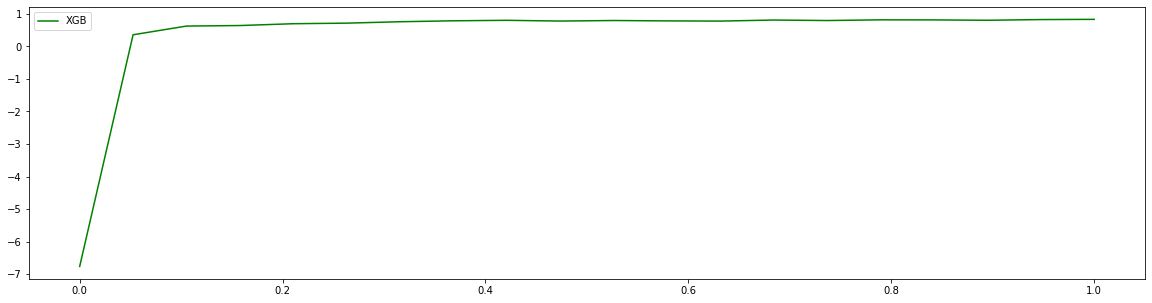

In [42]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

1.0 0.8320776498992342 0.005351395694609409
0.75 0.817335230885076 0.0026742987368480855
1.0 0.8320776498992342 0.005351395694609409 0.03354931135797358


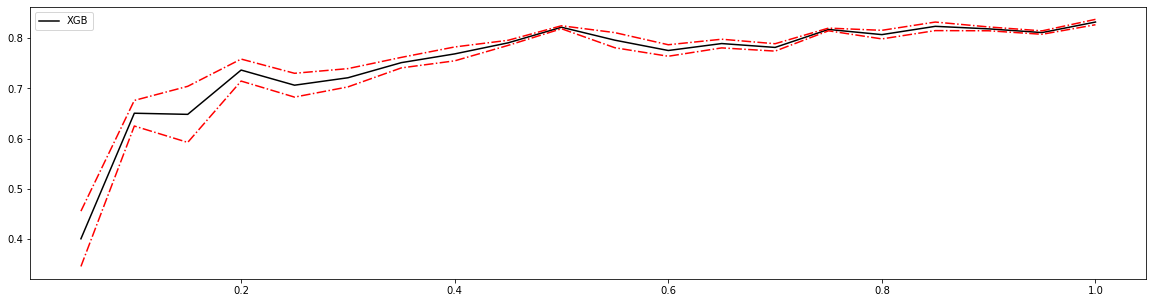

In [47]:
#继续细化学习曲线
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=160,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

1.0 0.8320776498992342 0.005351395694609409
0.9375 0.8213396591900601 0.002302095690752414
1.0 0.8320776498992342 0.005351395694609409 0.03354931135797358


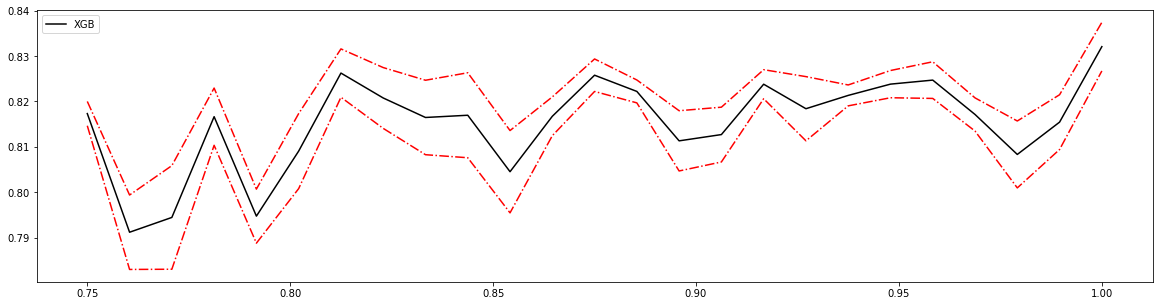

In [48]:
#细化学习曲线
axisx = np.linspace(0.75,1,25)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=160,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [49]:
reg = XGBR(n_estimators=160
           ,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.9050526026617368

In [50]:
MSE(Ytest,reg.predict(Xtest))

8.835224196909236

# eta

In [51]:
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i] #模型评估指标的名字
                                     ,CVS(reg
                                          ,Xtrain,Ytrain
                                          ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [54]:
reg = XGBR(n_estimators=160,random_state=420)

In [55]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.83
neg_mean_squared_error:-12.11


[0.8320776498992342, -12.108517056692513]

In [56]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)

[0.8320776498992342, -12.108517056692513]

In [59]:
from time import time
import datetime

for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=160,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:02:074213
	
learning_rate = 0.2
r2:0.83
neg_mean_squared_error:-12.29
00:03:405210
	
learning_rate = 0.5
r2:0.82
neg_mean_squared_error:-12.48
00:01:987428
	
learning_rate = 1
r2:0.71
neg_mean_squared_error:-20.06
00:01:393002
	


0.1 0.8356335731247263


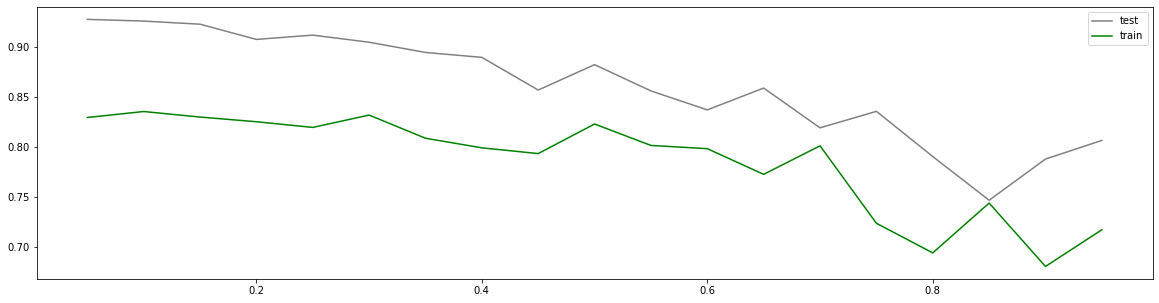

In [60]:
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=160,random_state=420,learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="test")
plt.plot(axisx,rs,c="green",label="train")
plt.legend()
plt.show()

# booster

In [61]:
for booster in ["gbtree","gblinear","dart"]:
    reg = XGBR(n_estimators=180
               ,learning_rate=0.1
               ,random_state=420
               ,booster=booster).fit(Xtrain,Ytrain)
    print(booster)
    print(reg.score(Xtest,Ytest))

gbtree
0.9260984369386971
gblinear
0.6502419239850123
dart
0.9260984459922119


In [62]:
reg = XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest, Ytest)

0.9050526026617368

In [63]:
MSE(Ytest,reg.predict(Xtest))

8.835224196909236

In [64]:
import xgboost as xgb
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)
dtrain

In [65]:
import pandas as pd
pd.DataFrame(Xtrain)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
1,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
2,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
3,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
4,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.03871,52.5,5.32,0.0,0.405,6.209,31.3,7.3172,6.0,293.0,16.6,396.90,7.14
350,0.12650,25.0,5.13,0.0,0.453,6.762,43.4,7.9809,8.0,284.0,19.7,395.58,9.50
351,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11
352,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52


In [66]:
param = {'objective':'reg:linear'
         ,"eta":0.1}
num_round = 160 

In [67]:
bst = xgb.train(param, dtrain, num_round)

[10:40:00] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:40:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [68]:
preds = bst.predict(dtest)

In [69]:
preds

array([ 6.455705 , 22.094864 , 30.780926 , 13.3854065,  8.404386 ,
       23.60258  , 14.235775 , 15.949026 , 15.523221 , 14.114215 ,
       24.063562 , 34.36054  , 21.45416  , 28.812864 , 19.5613   ,
       10.17152  , 19.422009 , 23.556221 , 22.850714 , 23.171673 ,
       17.833193 , 16.103    , 27.601276 , 20.78776  , 20.887596 ,
       15.854918 , 22.09172  , 29.281677 , 22.82485  , 15.7689295,
       36.676235 , 21.046375 , 20.162252 , 23.797886 , 22.755018 ,
       23.851278 , 15.590613 , 24.5704   , 17.716793 , 33.970375 ,
       18.812212 , 20.463076 , 37.11063  , 18.0787   , 12.729707 ,
       31.156633 , 45.911175 , 12.708427 , 10.771535 , 36.06169  ,
       26.267761 , 19.934822 , 20.70839  , 48.836052 , 27.543344 ,
       25.270641 , 17.15841  , 21.252327 , 17.45341  , 18.479298 ,
       14.6937   , 22.837267 , 18.869286 , 30.04693  , 29.922459 ,
       18.732492 , 18.782242 , 16.391432 , 23.147203 , 19.126724 ,
       29.737858 , 42.125793 , 31.545622 , 23.023172 , 19.5476

In [70]:
from sklearn.metrics import r2_score
r2_score(Ytest,preds)

0.9262354628669508

In [71]:
MSE(Ytest,preds)

6.864076758521994

# gmma

In [72]:
import xgboost as xgb

dfull = xgb.DMatrix(X,y)

In [84]:
param1 = {'objective':'reg:squarederror',"gamma":0}
num_round = 180
n_fold=5 

In [85]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:857133


In [86]:
cvresult1

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105577,0.129117,17.163215,0.584296
1,12.337973,0.097557,12.519735,0.473458
2,8.994071,0.065756,9.404534,0.472309
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920812,0.591874
...,...,...,...,...
175,0.001299,0.000289,3.669898,0.857676
176,0.001285,0.000261,3.669897,0.857677
177,0.001275,0.000239,3.669903,0.857669
178,0.001263,0.000217,3.669901,0.857672


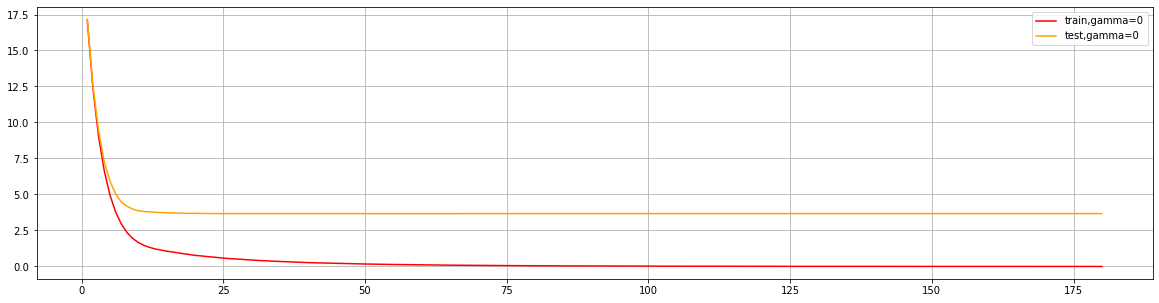

In [88]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

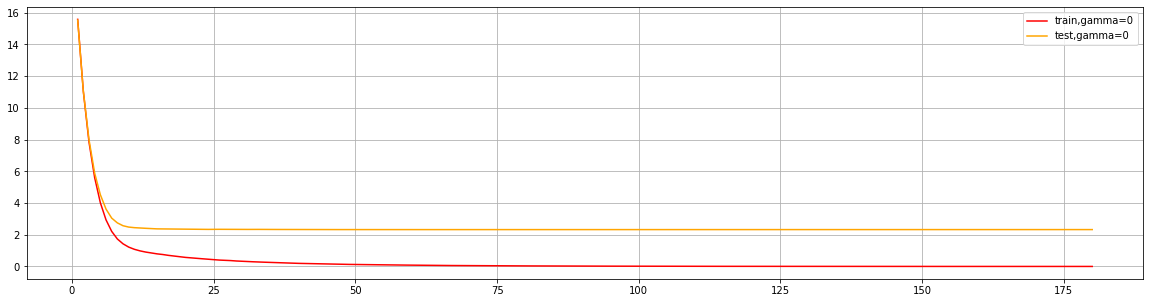

In [89]:
param1 = {'objective':'reg:squarederror',"gamma":0,"eval_metric":"mae"}
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

In [92]:
param1 = {'objective':'reg:squarederror',"gamma":0}
param2 = {'objective':'reg:squarederror',"gamma":20}
num_round = 180
n_fold=5

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:852719


In [93]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:919149


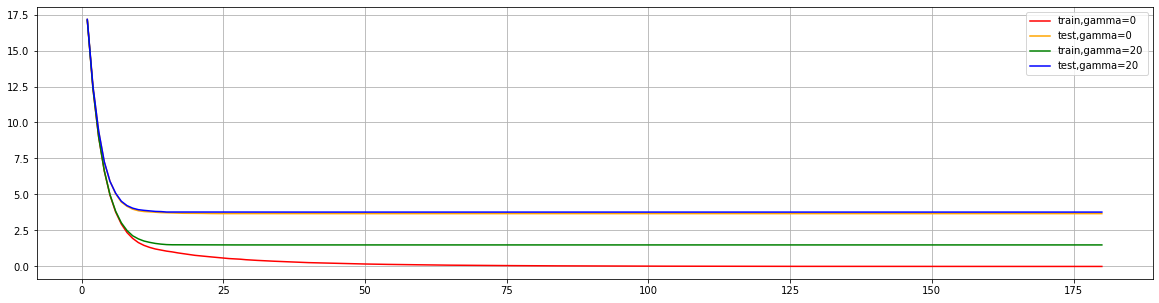

In [94]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181),cvresult2.iloc[:,0],c="green",label="train,gamma=20")
plt.plot(range(1,181),cvresult2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

In [95]:
import xgboost as xgb
import matplotlib.pyplot as plt
from time import time
import datetime

In [102]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()

x2 = data2.data
y2 = data2.target

dfull2 = xgb.DMatrix(x2,y2)

param1 = {'objective':'binary:logistic',"gamma":0
          ,"eval_metric":"error"
         }
param2 = {'objective':'binary:logistic',"gamma":1}
num_round = 100

In [103]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull2, num_round,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:177521


In [104]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull2, num_round,metrics=("error")) 
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:226394


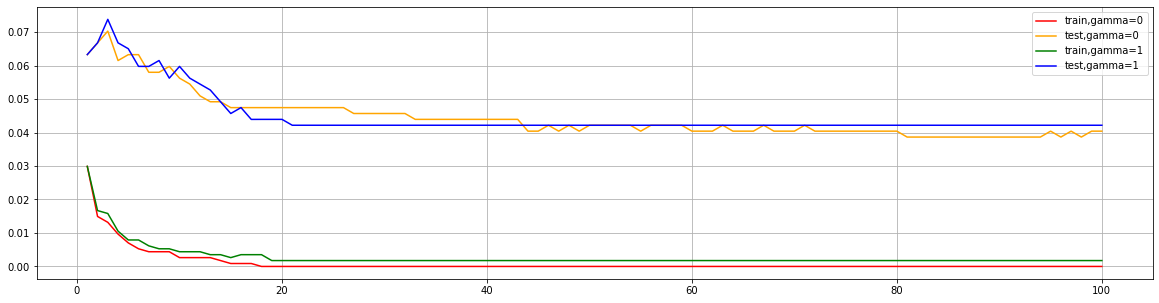

In [105]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101),cvresult2.iloc[:,0],c="green",label="train,gamma=1")
plt.plot(range(1,101),cvresult2.iloc[:,2],c="blue",label="test,gamma=1")
plt.legend()
plt.show()

# 过拟合

In [108]:
dfull = xgb.DMatrix(X,y)

param1 = {'objective':'reg:squarederror'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1}
num_round = 200

00:00:523127


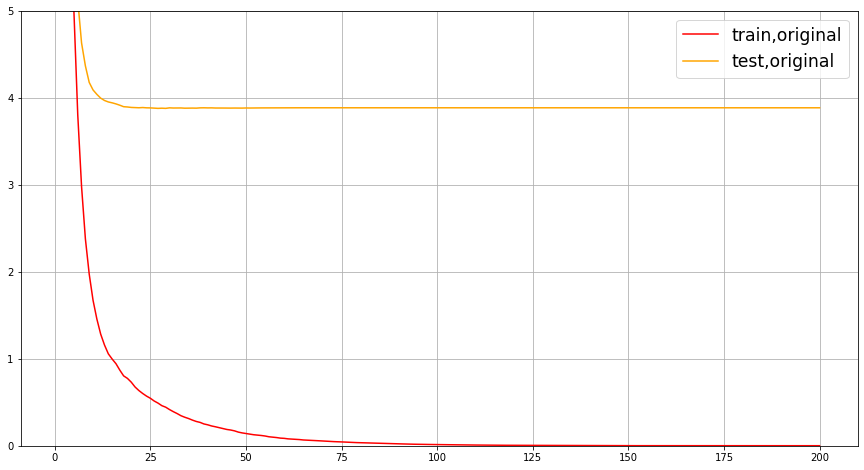

In [109]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

00:00:524170
00:00:283838
00:00:374919


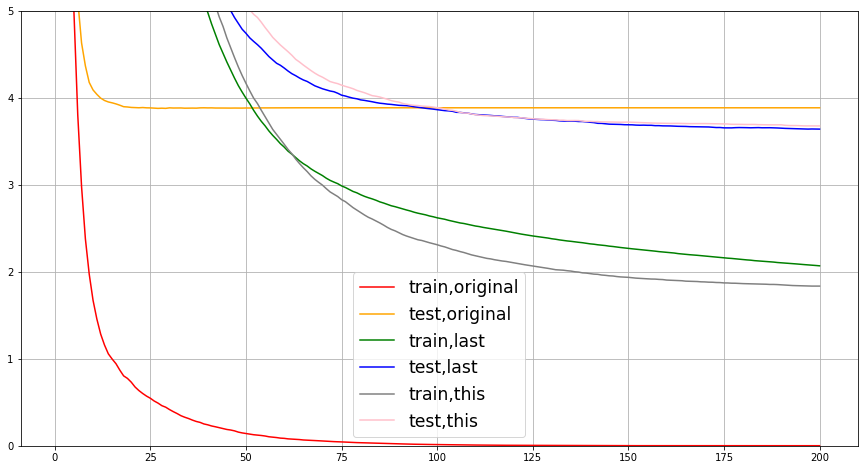

In [111]:
param1 = {'objective':'reg:squarederror'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1}
num_round = 200

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")

param2 = {'objective':'reg:squarederror'
          ,"max_depth":2
          ,"eta":0.05
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":0.4
          ,"colsample_bynode":1}

param3 = {'objective':'reg:squarederror'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1}

time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvresult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

# 保存模型

In [114]:
import pickle
dtrain = xgb.DMatrix(Xtrain,Ytrain)

#设定参数，对模型进行训练
param = {'objective':'reg:squarederror'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1}
num_round = 180

bst = xgb.train(param, dtrain, num_round)

In [115]:
pickle.dump(bst, open("xgboostonboston.dat","wb"))

In [116]:
import sys
sys.path

['C:\\Users\\inori\\Documents\\github\\Sci-kit Learn\\12.XGBoost',
 'C:\\ProgramData\\Anaconda3\\python38.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\inori\\.ipython']

In [118]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pickle
import xgboost as xgb

In [119]:
data = load_boston()

X = data.data
y = data.target

Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [120]:
dtest = xgb.DMatrix(Xtest,Ytest)
loaded_model = pickle.load(open("xgboostonboston.dat", "rb"))
print("Loaded model from: xgboostonboston.dat")

Loaded model from: xgboostonboston.dat


In [121]:
ypreds = loaded_model.predict(dtest)
ypreds

array([ 9.278189 , 22.734112 , 29.49379  , 12.983151 ,  9.501983 ,
       20.643223 , 15.942372 , 15.831039 , 15.698411 , 15.967683 ,
       21.101307 , 35.83475  , 20.486403 , 29.231373 , 20.785269 ,
       12.0639305, 17.634281 , 26.05238  , 25.247683 , 23.5034   ,
       18.00751  , 16.483337 , 25.402018 , 22.421213 , 20.117733 ,
       16.29775  , 21.58729  , 25.936457 , 23.091265 , 16.585093 ,
       35.39749  , 20.128454 , 20.370457 , 23.711693 , 23.2132   ,
       24.522055 , 16.185257 , 23.857044 , 18.04799  , 34.886368 ,
       17.500023 , 21.3877   , 33.37537  , 18.835125 , 15.2021055,
       28.557238 , 42.054836 , 16.839176 , 10.032375 , 37.126007 ,
       26.214668 , 21.136717 , 20.56424  , 47.07938  , 27.928053 ,
       25.919254 , 18.91586  , 20.73725  , 17.170164 , 18.296001 ,
       15.074967 , 23.753801 , 19.82896  , 31.379152 , 29.385721 ,
       20.15055  , 20.949522 , 17.336159 , 22.490997 , 16.978098 ,
       28.754507 , 40.5415   , 30.079725 , 22.954508 , 20.1310

In [122]:
from sklearn.metrics import mean_squared_error as MSE, r2_score
MSE(Ytest,ypreds)

9.178375452806907

In [123]:
r2_score(Ytest,ypreds)

0.9013649408758324

In [124]:
bst = xgb.train(param, dtrain, num_round)

In [125]:
import joblib

joblib.dump(bst,"xgboost-boston.dat")

['xgboost-boston.dat']

In [126]:
loaded_model = joblib.load("xgboost-boston.dat")

In [127]:
dtest = xgb.DMatrix(Xtest,Ytest)
ypreds = loaded_model.predict(dtest)

In [128]:
ypreds

array([ 9.278189 , 22.734112 , 29.49379  , 12.983151 ,  9.501983 ,
       20.643223 , 15.942372 , 15.831039 , 15.698411 , 15.967683 ,
       21.101307 , 35.83475  , 20.486403 , 29.231373 , 20.785269 ,
       12.0639305, 17.634281 , 26.05238  , 25.247683 , 23.5034   ,
       18.00751  , 16.483337 , 25.402018 , 22.421213 , 20.117733 ,
       16.29775  , 21.58729  , 25.936457 , 23.091265 , 16.585093 ,
       35.39749  , 20.128454 , 20.370457 , 23.711693 , 23.2132   ,
       24.522055 , 16.185257 , 23.857044 , 18.04799  , 34.886368 ,
       17.500023 , 21.3877   , 33.37537  , 18.835125 , 15.2021055,
       28.557238 , 42.054836 , 16.839176 , 10.032375 , 37.126007 ,
       26.214668 , 21.136717 , 20.56424  , 47.07938  , 27.928053 ,
       25.919254 , 18.91586  , 20.73725  , 17.170164 , 18.296001 ,
       15.074967 , 23.753801 , 19.82896  , 31.379152 , 29.385721 ,
       20.15055  , 20.949522 , 17.336159 , 22.490997 , 16.978098 ,
       28.754507 , 40.5415   , 30.079725 , 22.954508 , 20.1310

In [129]:
MSE(Ytest, ypreds)

9.178375452806907

In [130]:
r2_score(Ytest,ypreds)

0.9013649408758324

In [131]:
from xgboost import XGBRegressor as XGBR

bst = XGBR(n_estimators=200
           ,eta=0.05,gamma=20
           ,reg_lambda=3.5
           ,reg_alpha=0.2
           ,max_depth=4
           ,colsample_bytree=0.4
           ,colsample_bylevel=0.6).fit(Xtrain,Ytrain)

In [132]:
joblib.dump(bst,"xgboost-boston-sklearn.dat")

['xgboost-boston-sklearn.dat']

In [133]:
loaded_model = joblib.load("xgboost-boston-sklearn.dat")
ypreds = loaded_model.predict(Xtest)
Xtest

array([[4.15292e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.29460e+02, 2.73800e+01],
       [2.73100e-02, 0.00000e+00, 7.07000e+00, ..., 1.78000e+01,
        3.96900e+02, 9.14000e+00],
       [3.15000e-02, 9.50000e+01, 1.47000e+00, ..., 1.70000e+01,
        3.96900e+02, 4.56000e+00],
       ...,
       [5.08300e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.89710e+02, 5.68000e+00],
       [3.77498e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.20100e+01, 1.71500e+01],
       [1.96091e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.34400e+01]])

In [134]:
dtest

In [135]:
ypreds

array([ 9.209096 , 22.70573  , 29.492292 , 12.896596 ,  9.380931 ,
       20.598948 , 15.930355 , 15.803482 , 15.670854 , 15.964941 ,
       21.098568 , 35.83325  , 20.443174 , 29.229876 , 20.717224 ,
       12.092506 , 17.78799  , 26.038475 , 25.238808 , 23.554081 ,
       17.9599   , 16.415293 , 25.361229 , 22.430357 , 20.073458 ,
       16.253475 , 21.560781 , 26.077642 , 23.089767 , 16.53853  ,
       35.38861  , 20.125715 , 20.407557 , 23.721558 , 23.204325 ,
       24.524542 , 16.116165 , 23.840025 , 18.020435 , 34.884865 ,
       17.455748 , 21.375666 , 33.334576 , 18.818806 , 15.237378 ,
       28.55574  , 42.143997 , 17.188314 , 10.274554 , 37.110027 ,
       26.213171 , 21.206903 , 20.553146 , 47.0634   , 27.926361 ,
       25.937069 , 18.871584 , 20.754017 , 17.125889 , 18.293262 ,
       15.072226 , 23.72542  , 19.820786 , 31.370277 , 29.376846 ,
       20.147812 , 20.909628 , 17.267067 , 22.507765 , 16.909006 ,
       28.764372 , 40.577892 , 30.116125 , 22.956995 , 20.0867

In [136]:
MSE(Ytest, ypreds)

9.18818551539731

In [137]:
r2_score(Ytest,ypreds)

0.9012595174151566

# XGB中的样本不均衡问题

In [138]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs #自创数据集
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

In [139]:
class_1 = 500 
class_2 = 50 
centers = [[0.0, 0.0], [2.0, 2.0]] 
clusters_std = [1.5, 0.5] 
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [140]:
X.shape

(550, 2)

In [141]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
(y == 1).sum() / y.shape[0]

0.09090909090909091

In [143]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)
clf = XGBC().fit(Xtrain,Ytrain)
ypred = clf.predict(Xtest)
ypred

[11:08:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [144]:
clf.score(Xtest,Ytest)

0.9272727272727272

In [145]:
cm(Ytest,ypred,labels=[1,0])

array([[  9,   4],
       [  8, 144]], dtype=int64)

In [146]:
recall(Ytest,ypred)

0.6923076923076923

In [147]:
auc(Ytest,clf.predict_proba(Xtest)[:,1])

0.9701417004048585

In [148]:
clf_ = XGBC(scale_pos_weight=10).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest,Ytest)

cm(Ytest,ypred_,labels=[1,0])

recall(Ytest,ypred_)

auc(Ytest,clf_.predict_proba(Xtest)[:,1])

[11:12:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9696356275303644

In [150]:
import warnings
warnings.filterwarnings('ignore')


for i in [1,5,10,20,30]:
    clf_ = XGBC(scale_pos_weight=i).fit(Xtrain,Ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(Xtest,Ytest)))
    print("\tRecall:{}".format(recall(Ytest,ypred_)))
    print("\tAUC:{}".format(auc(Ytest,clf_.predict_proba(Xtest)[:,1])))

[11:13:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9701417004048585
[11:13:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9660931174089069
[11:13:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
10
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.96963562753036

In [151]:
clf_ = XGBC(scale_pos_weight=20).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest,Ytest)

[11:13:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9333333333333333

In [152]:
cm(Ytest,ypred_,labels=[1,0])

array([[ 10,   3],
       [  8, 144]], dtype=int64)

In [153]:
recall(Ytest,ypred_)

0.7692307692307693

In [154]:
auc(Ytest,clf_.predict_proba(Xtest)[:,1])

0.9686234817813765

In [155]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [156]:
param = {'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":1}
num_round = 100

In [157]:
bst = xgb.train(param, dtrain, num_round)

[11:15:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [158]:
preds = bst.predict(dtest)
preds

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [159]:
ypred = preds.copy()

In [160]:
ypred[preds > 0.5] = 1

In [161]:
ypred[ypred != 1] = 0

In [162]:
scale_pos_weight = [1,5,10]
names = ["negative vs positive: 1"
         ,"negative vs positive: 5"
         ,"negative vs positive: 10"]

In [163]:
[*zip(names,scale_pos_weight)]

[('negative vs positive: 1', 1),
 ('negative vs positive: 5', 5),
 ('negative vs positive: 10', 10)]

In [164]:
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, roc_auc_score as auc

for name,i in zip(names,scale_pos_weight):
    param = {'silent':True,'objective':'binary:logistic'
            ,"eta":0.1,"scale_pos_weight":i}
    num_round = 100
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[ypred != 1] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
    print("\tRecall:{}".format(recall(Ytest,ypred)))
    print("\tAUC:{}".format(auc(Ytest,preds)))

[11:16:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:16:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
negative vs positive: 1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
[11:16:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fla

In [166]:
for name,i in zip(names,scale_pos_weight):
    for thres in [0.3,0.5,0.7,0.9]:
        param= {'objective':'binary:logistic'
                ,"eta":0.1,"scale_pos_weight":i}
        clf = xgb.train(param, dtrain, num_round)
        preds = clf.predict(dtest)
        ypred = preds.copy()
        ypred[preds > thres] = 1
        ypred[ypred != 1] = 0
        print("{},thresholds:{}".format(name,thres))
        print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
        print("\tRecall:{}".format(recall(Ytest,ypred)))
        print("\tAUC:{}".format(auc(Ytest,preds)))

[11:16:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
negative vs positive: 1,thresholds:0.3
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9741902834008097
[11:16:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
negative vs positive: 1,thresholds:0.5
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
[11:16:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
negati